**Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import array as arr

**Reading the train set and displaying its head (first 5 rows)**

In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/train.csv')
train_set.head()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2009070100,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2009070101,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2009070102,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2009070103,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2009070104,0.045,0.032,0.079,0.039,0.010,0.000,0.000


**Graph depicting variation of wind power from test set with date**

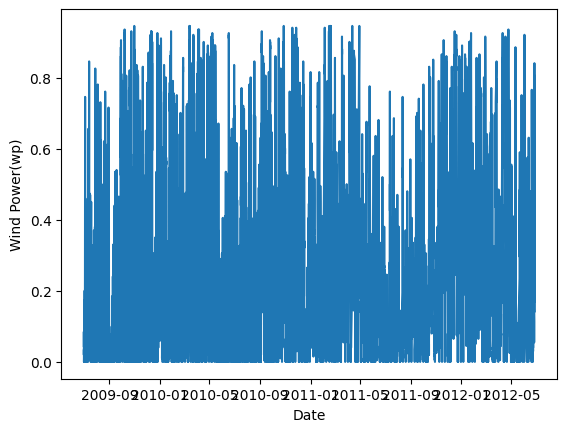

In [ ]:
plt.plot(train_set['date'], train_set['wp1'], '-')
plt.xlabel('Date')
plt.ylabel('Wind Power(wp)')
plt.show()

In [ ]:
# Knowing the data types of the train set columns
train_set.dtypes


date      int64
wp1     float64
wp2     float64
wp3     float64
wp4     float64
wp5     float64
wp6     float64
wp7     float64
dtype: object

**Date conversion into form yy-mm-hh**

In [ ]:
train_set["date"] = pd.to_datetime(train_set["date"], format="%Y%m%d%H")
train_set.head()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2009-07-01 00:00:00,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2009-07-01 01:00:00,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2009-07-01 02:00:00,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2009-07-01 03:00:00,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2009-07-01 04:00:00,0.045,0.032,0.079,0.039,0.010,0.000,0.000


**Reading the test set and displaying its head (first 5 rows)**

In [ ]:
test_set = pd.read_csv('/content/drive/MyDrive/test.csv')
test_set.head()

,id,date
0,4866,2011122106
1,2167,2011060719
2,5522,2012020714
3,6474,2012041518
4,3889,2011101113


*Required Timestamps*

In [ ]:
train_set['date'].min()
train_set['date'].max()

Timestamp('2012-06-26 12:00:00')

*Code to describe the train set*

In [ ]:
train_set.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,wp1,wp2,wp3,wp4,wp5,wp6,wp7
count,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000
mean,0.252388,0.265983,0.334571,0.286173,0.272584,0.286774,0.290542
std,0.246381,0.273205,0.318636,0.295069,0.294221,0.283023,0.305272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.010000,0.000000,0.000000,0.013000,0.000000
25%,0.050000,0.042000,0.069000,0.022000,0.040000,0.053000,0.025000
50%,0.175000,0.164000,0.217000,0.182000,0.157000,0.184000,0.177000
75%,0.381000,0.423000,0.563000,0.474000,0.415000,0.461000,0.505000
90%,0.652000,0.730000,0.899000,0.793000,0.814000,0.776000,0.833000
95%,0.787000,0.852000,0.949000,0.893000,0.930000,0.882000,0.909000


*Files were sourced from my google drive(mounting of google drive). So the paths were defined from my drive files*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Shortening of the windforecast files as dataframes for easy recognition and function calling**

In [ ]:
windforecasts_sets = {f"wp{i}": f"/content/drive/MyDrive/windforecasts_wf{i}.csv" for i in range(1, 8)}
wf1_df = pd.read_csv(windforecasts_sets["wp1"])
wf1_df.head(10)

,date,hors,u,v,ws,wd
0,2009070100,1,2.34,-0.79,2.47,108.68
1,2009070100,2,2.18,-0.99,2.40,114.31
2,2009070100,3,2.20,-1.21,2.51,118.71
3,2009070100,4,2.35,-1.40,2.73,120.86
4,2009070100,5,2.53,-1.47,2.93,120.13
5,2009070100,6,2.66,-1.29,2.96,115.79
6,2009070100,7,2.69,-0.81,2.81,106.71
7,2009070100,8,2.72,-0.26,2.73,95.39
8,2009070100,9,2.87,0.08,2.87,88.50
9,2009070100,10,3.23,-0.01,3.23,90.19


In [ ]:
wf1_df.describe()

,date,hors,u,v,ws,wd
count,1.048320e+05,104832.000000,93672.000000,93672.00000,93672.000000,93672.000000
mean,2.010559e+09,24.500000,1.598712,-0.09969,4.072487,144.814262
std,9.402333e+05,13.853465,3.052834,2.87600,1.889861,93.518468
min,2.009070e+09,1.000000,-9.240000,-10.85000,0.010000,0.020000
25%,2.010033e+09,12.750000,-0.430000,-2.23000,2.750000,72.920000
50%,2.010123e+09,24.500000,1.890000,-0.17000,3.680000,122.630000
75%,2.011093e+09,36.250000,3.530000,2.06000,5.110000,197.180000
max,2.012063e+09,48.000000,15.250000,10.71000,15.810000,359.990000


**Data pre-processing, use of XGBoost for regression and train set - dev set split** 

In [ ]:
def data_processing(df_wf1, y_col):
    # Getting the forecast date for wind forecasts
    df_wf1['date'] = pd.to_datetime(df_wf1['date'], format='%Y%m%d%H')
    df_wf1['hors_delta'] = pd.to_timedelta(df_wf1.hors, unit='hours')
    df_wf1['forecast_date'] = df_wf1['date']+ df_wf1['hors_delta']
    df_wf1.drop(columns= 'hors_delta', inplace=True)
    # MErging to get all independent and dependent features in 1 dataset
    df_wf1a = df_wf1.merge(train_set[['date',y_col]], how='left', left_on='forecast_date', right_on='date')
    df_wf1a.rename(columns={y_col:'power'}, inplace=True)
    df_wf1a.rename(columns={'date_x':'date'}, inplace=True)
    df_wf1a.drop(columns='date_y', inplace=True)
    
    # Selecting only those records where complete forecasts are available - 4counts and averaging the power forecasts 
    df_wf1b = df_wf1a.groupby('forecast_date').agg({'power': 'mean',
                                                    'hors':'count'}).reset_index()
    df_wf1b.dropna(subset=['power'], inplace=True)
    df_wf1b = df_wf1b[df_wf1b.hors==4]
    df_wf1b.drop(columns='hors', inplace=True)

    # Creating Average feature based on 2 latest rolling wind forecasts - to incorporate recent behavior only
    df_wf1a['u_avg'] = df_wf1a.groupby('forecast_date').u.transform(lambda x: x.rolling(2, min_periods=1).mean())
    df_wf1a['v_avg'] = df_wf1a.groupby('forecast_date').v.transform(lambda x: x.rolling(2, min_periods=1).mean())
    df_wf1a['ws_avg'] = df_wf1a.groupby('forecast_date').ws.transform(lambda x: x.rolling(2, min_periods=1).mean())
    df_wf1a['wd_avg'] = df_wf1a.groupby('forecast_date').wd.transform(lambda x: x.rolling(2, min_periods=1).mean())

    df_wf1c = df_wf1a.groupby('forecast_date').last().reset_index()
    df_wf1c.columns

    # Other features reflecting the timing of the forecast date
    df_wf1c['year'] = df_wf1c.forecast_date.dt.year
    df_wf1c['month'] = df_wf1c.forecast_date.dt.month
    df_wf1c['day'] = df_wf1c.forecast_date.dt.day
    df_wf1c['hour'] = df_wf1c.forecast_date.dt.hour
    df_wf1c['dayofweek'] = df_wf1c.forecast_date.dt.dayofweek
    df_wf1c['weekday'] = np.where(df_wf1c.forecast_date.dt.dayofweek>4,0,1)

    #coverting degrees to radian for the model to understand
    df_wf1c['wd_radian'] = df_wf1c['wd']*( (np.pi)/180)

    df_wf1c.columns

    df_wf1d = df_wf1b.merge(df_wf1c[['forecast_date','u_avg', 'v_avg', 'ws_avg', 'wd_avg', 'year', 'month', 'day',
                                     'hour', 'dayofweek', 'weekday', 'wd_radian']],
                            on='forecast_date', how='left')

    return df_wf1d



# Calling the function for creating master dataset for each wind farm
df_wf1 = pd.read_csv(windforecasts_sets["wp1"])
farm1 = data_processing(df_wf1,'wp1')
farm1['farm_no'] = 'farm1'

df_wf2 = pd.read_csv(windforecasts_sets["wp2"])
farm2 = data_processing(df_wf2,'wp2')
farm2['farm_no'] = 'farm2'

df_wf3 = pd.read_csv(windforecasts_sets["wp3"])
farm3 = data_processing(df_wf3,'wp3')
farm3['farm_no'] = 'farm3'

df_wf4 = pd.read_csv(windforecasts_sets["wp4"])
farm4 = data_processing(df_wf4,'wp4')
farm4['farm_no'] = 'farm4'

df_wf5 = pd.read_csv(windforecasts_sets["wp5"])
farm5 = data_processing(df_wf5,'wp5')
farm5['farm_no'] = 'farm5'

df_wf6 = pd.read_csv(windforecasts_sets["wp6"])
farm6 = data_processing(df_wf5,'wp6')
farm6['farm_no'] = 'farm6'

df_wf7 = pd.read_csv(windforecasts_sets["wp7"])
farm7 = data_processing(df_wf5,'wp7')
farm7['farm_no'] = 'farm7'

df = pd.concat([farm1, farm2, farm3, farm4, farm5, farm6, farm7])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['farm_no']= label_encoder.fit_transform(df['farm_no'])  
df['farm_no'].unique()

# Independent and dependent features
y = df[['power']]
X = df.drop(columns=['power','forecast_date'])

# Train-test split is 85 % and 15 % respectively
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=13,stratify=X.farm_no)

from xgboost import XGBRegressor

xgb_r = XGBRegressor(alpha=0.016, learning_rate=0.1, max_depth=15, 
                     min_child_weight=3, n_estimators=100, 
                     subsample=0.8, tree_method='hist')

xgb_r.fit(X_train, y_train)
  
pred = xgb_r.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

# printing of root mean squared error (rmse) and r2 score
print(rmse)
print(r2)

# rmse < 0.9



0.10655373053337765
0.8656913676115382


**Printing the predictions**

In [ ]:
print(pred)

[0.11093586 0.02447725 0.6560234  ... 0.00122856 0.84129804 0.1336658 ]


**Calculating and viewing Mean Absolute Error (MAE) and Mean Squared Error (MSE)**

In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, pred)

print(MAE)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test ,  pred)

print(MSE)

0.07314860989538614
0.011353697490579656
